In [14]:
from read_data import *
from changepoint_detection import *

In [16]:
data = process_data()

In [17]:
selected_sensors = ["CH1_Moment", "CH2_Kraft"]

In [5]:
changepoints = generate_changepoints(data, selected_sensors)

/Users/aymanehachcham/miniconda3/envs/tad/lib/python3.10/site-packages/ruptures/costs/costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


In [11]:
data['V2_00001']['dat']

,CH1_Moment,CH2_Kraft,CH3_SyncSig,CH4_akustik,CH5_a1_WSAS,CH6_a2_WSAF,CH7_a3_BOZA,time
0,-25.056,275.904,10.9664,-0.0012,-4.832,-2.936,-0.16,0.00000
1,-33.048,714.668,10.9736,-0.0092,-4.952,-7.968,0.24,0.00005
2,-26.712,486.664,10.9688,-0.0192,-4.608,-13.640,2.08,0.00010
3,-11.952,-252.912,10.9672,-0.0470,-5.928,-8.600,3.00,0.00015
4,0.360,-956.084,10.9664,-0.0674,-4.384,0.344,3.76,0.00020
...,...,...,...,...,...,...,...,...
5829931,-1.008,-164.776,10.9672,-0.0590,0.064,-0.048,0.04,291.49655
5829932,3.816,-465.588,10.9616,-0.0604,0.048,-0.128,0.04,291.49660
5829933,7.632,-668.684,10.9696,-0.0542,0.112,-0.056,-0.12,291.49665
5829934,7.128,-549.892,10.9656,-0.0488,0.072,-0.128,0.00,291.49670


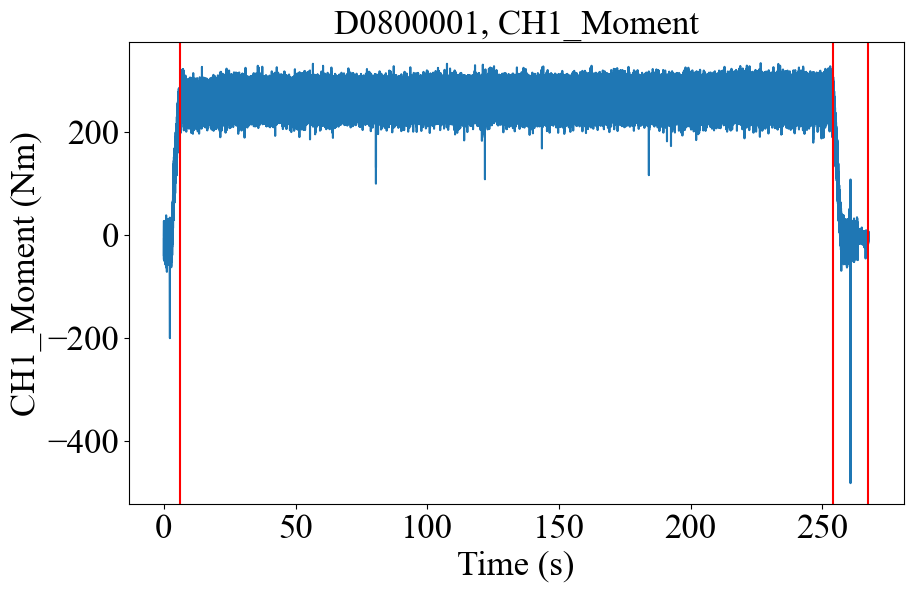

In [36]:

dataset = 'V20_0001'
sensor = 'CH1_Moment'

x_value = data[dataset]['dat']['time']
y_value = data[dataset]['dat'][sensor]
hdr = data[dataset]["hdr"]

plt.figure(figsize=(10, 6))
plt.plot(x_value.values, y_value.values)
plt.title(dataset + ", " + sensor, fontsize=25)
plt.ylabel(sensor + " (" + hdr.vert_units[hdr.channel_names.index(sensor)] + ")", fontsize=25)
plt.xlabel("Time (s)", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)

for xc in changepoints[dataset][sensor]["change_points"]:
    plt.axvline(x=xc,color='red')


plt.show()
# plot_change_points_mult(datasets, data, changepoints, "CH1_Moment", (10, 6), "D_datasets_CH1_cpt.pdf")
# plot_change_points_mult(datasets, data, changepoints, "CH2_Kraft", (10, 6), "D_datasets_CH2_cpt.pdf")

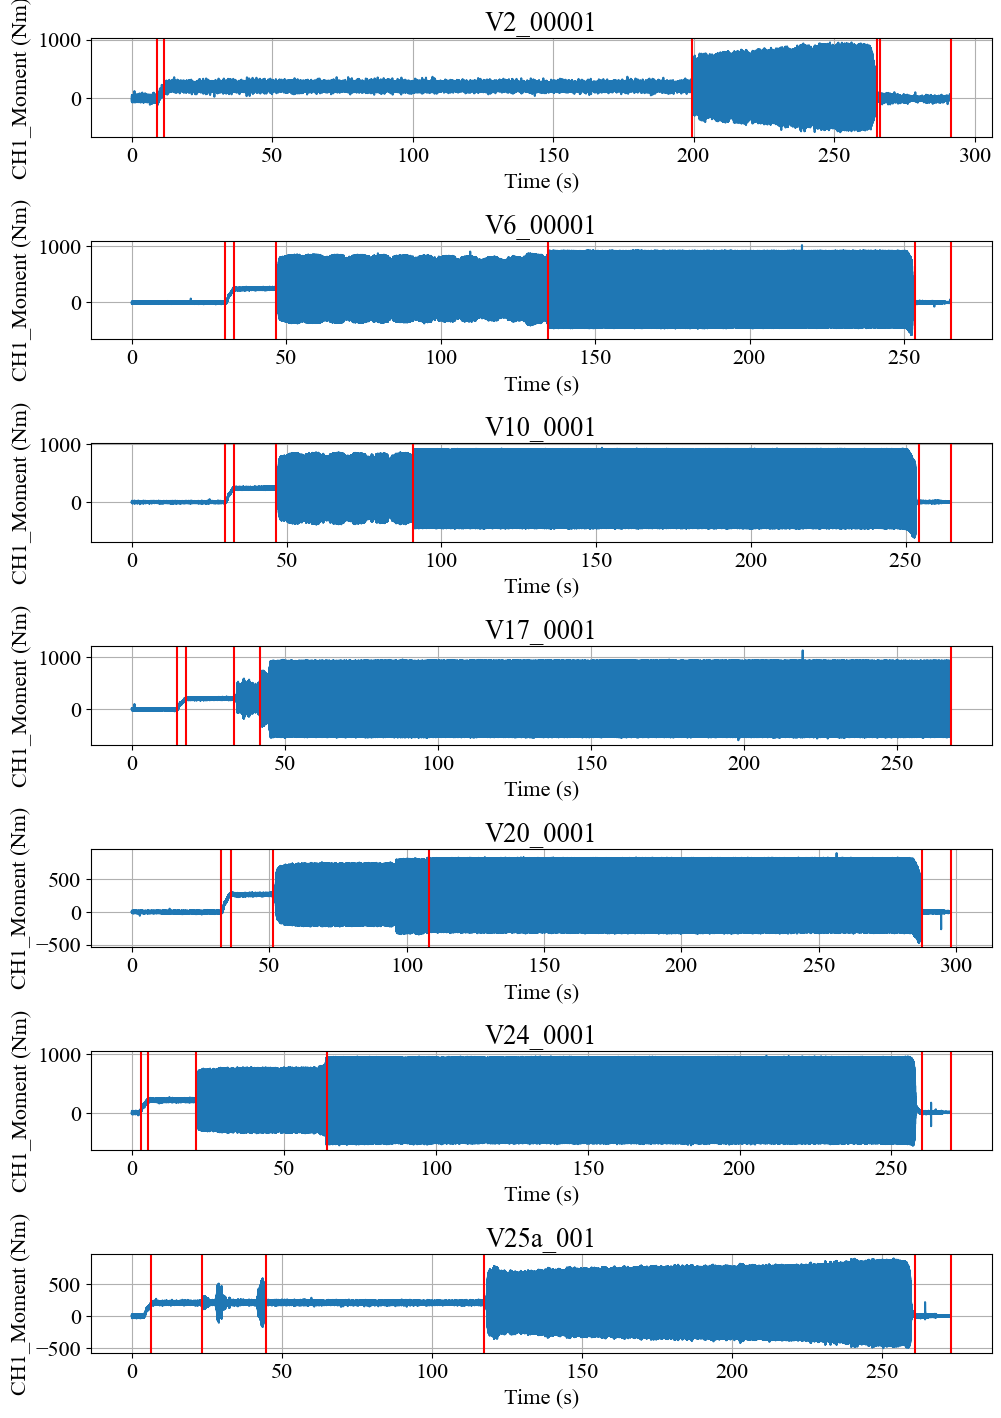

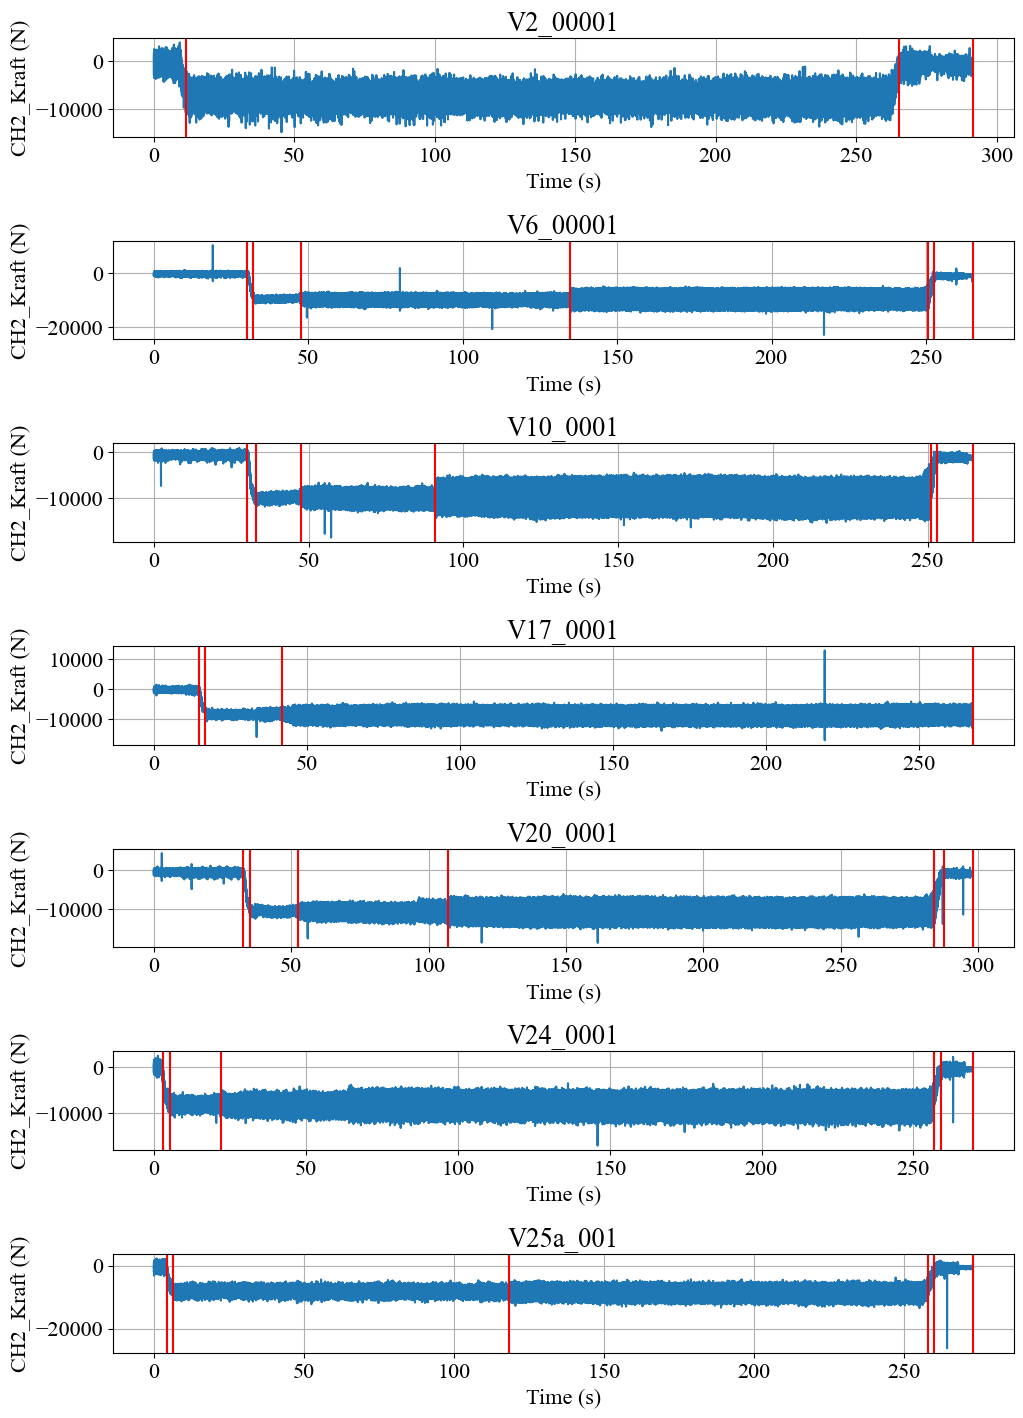

In [6]:
datasets = [
            'V2_00001',
            'V6_00001',
            'V10_0001',
            'V17_0001',
            'V20_0001',
            'V24_0001',
            'V25a_001'
        ]
plot_change_points_mult(datasets, data, changepoints, "CH1_Moment", (10, 14), "V_datasets_CH1_cpt.pdf")
plot_change_points_mult(datasets, data, changepoints, "CH2_Kraft", (10, 14), "V_datasets_CH2_cpt.pdf")